In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

In [18]:
# Load the dataset
data = pd.read_csv('../../src/data/water_quality.csv')

# Display the first few rows of the dataset
data.head()

,Ph,Turbidity,Temperature,Conductivity,Label
0,7.01,706.101031,20.529632,342.543917,1
1,7.25,721.232354,25.355915,325.120790,1
2,6.88,596.178640,29.599519,365.238751,1
3,7.89,674.121989,11.838675,259.524332,1
4,8.21,505.266735,14.167877,298.184947,1


In [19]:
# Features (X) and Labels (y)
X = data.drop('Label', axis=1).values
y = data['Label'].values

In [20]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### define the sigmoid fuction 1 / (1 + e^-z)

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [23]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (1/m) * (-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h))
    return cost

In [24]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for _ in range(num_iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [25]:
# Add a column of ones to X_train and X_test for the intercept term
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Initialize parameters
theta = np.zeros(X_train.shape[1])
learning_rate = 0.01
num_iterations = 1000

# Train the model
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

In [26]:
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

# Predict on the test set
y_pred = predict(X_test, theta)

In [27]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 88.47%


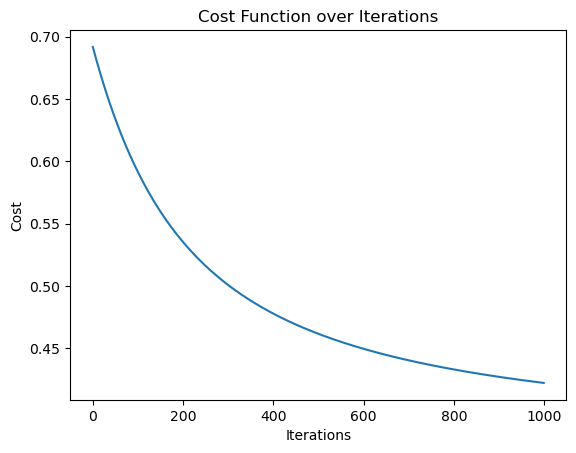

In [28]:
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

In [29]:
# Predict
y_pred = predict(X_test, theta)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 88.4706

Confusion Matrix:
[[713 189]
 [  7 791]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       902
           1       0.81      0.99      0.89       798

    accuracy                           0.88      1700
   macro avg       0.90      0.89      0.88      1700
weighted avg       0.90      0.88      0.88      1700



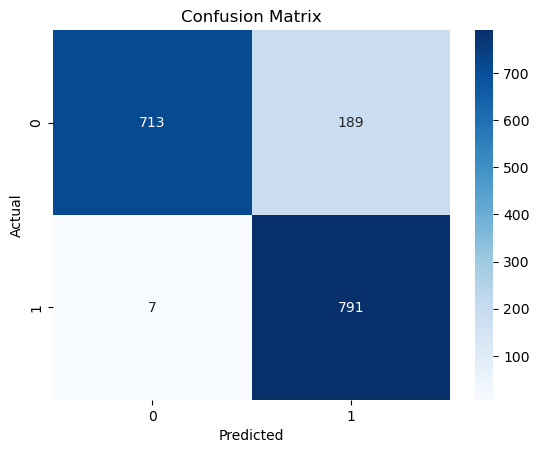

In [30]:
# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()